# **ML Assignment 8**

By 23520011 - Sharaneshwar Punjal

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV

In [3]:
df = pd.read_csv('polynomial_regression.csv')
train_data , test_data = train_test_split(df , test_size = 0.2,random_state = 42)

In [5]:
samples = []
for i in range(30):
    sample = train_data.sample(n=20, replace=False, random_state=i)
    samples.append(sample)

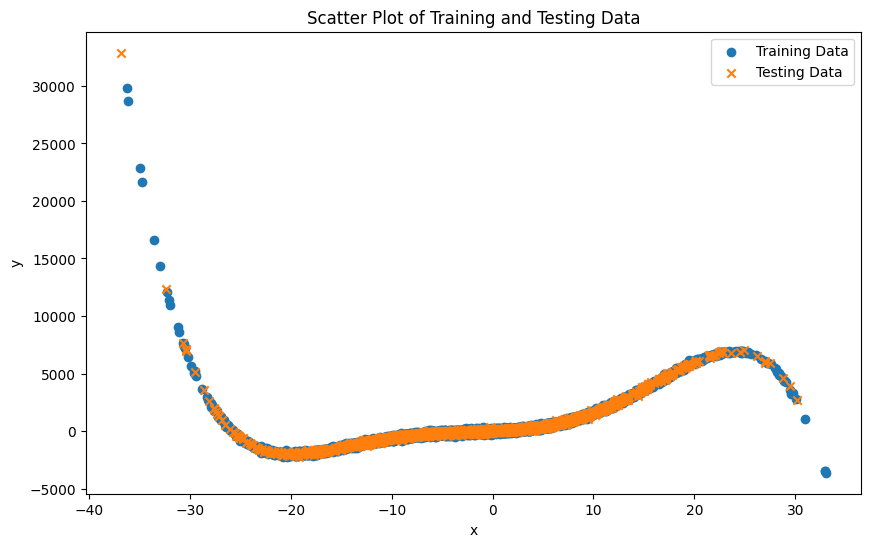

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['x'], train_data['y'], label='Training Data', marker='o')
plt.scatter(test_data['x'], test_data['y'], label='Testing Data', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Training and Testing Data')
plt.legend()
plt.show()


 Sample 1
Degree 1 | Train R²: 0.8707 | Test R²: 0.4578
Degree 2 | Train R²: 0.8066 | Test R²: 0.7030
Degree 3 | Train R²: 0.7161 | Test R²: 0.7310
Degree 4 | Train R²: 0.7979 | Test R²: 0.7950
Degree 5 | Train R²: 0.9931 | Test R²: 0.9965
Degree 6 | Train R²: 0.9931 | Test R²: 0.9965
Degree 7 | Train R²: 0.9931 | Test R²: 0.9965
Degree 8 | Train R²: 0.9931 | Test R²: 0.9965
Degree 9 | Train R²: 0.9887 | Test R²: 0.9925
Degree 10 | Train R²: 0.9860 | Test R²: 0.9919
Degree 11 | Train R²: 0.7624 | Test R²: 0.9072
Degree 12 | Train R²: 0.3705 | Test R²: 0.7569
Degree 13 | Train R²: 0.4480 | Test R²: 0.7363
Degree 14 | Train R²: 0.1575 | Test R²: 0.6059

 Sample 2
Degree 1 | Train R²: 0.5556 | Test R²: 0.4578
Degree 2 | Train R²: 0.8649 | Test R²: 0.7029
Degree 3 | Train R²: 0.7461 | Test R²: 0.7310
Degree 4 | Train R²: 0.7182 | Test R²: 0.7950
Degree 5 | Train R²: 0.9965 | Test R²: 0.9965
Degree 6 | Train R²: 0.9965 | Test R²: 0.9965
Degree 7 | Train R²: 0.9965 | Test R²: 0.9965
Degree 

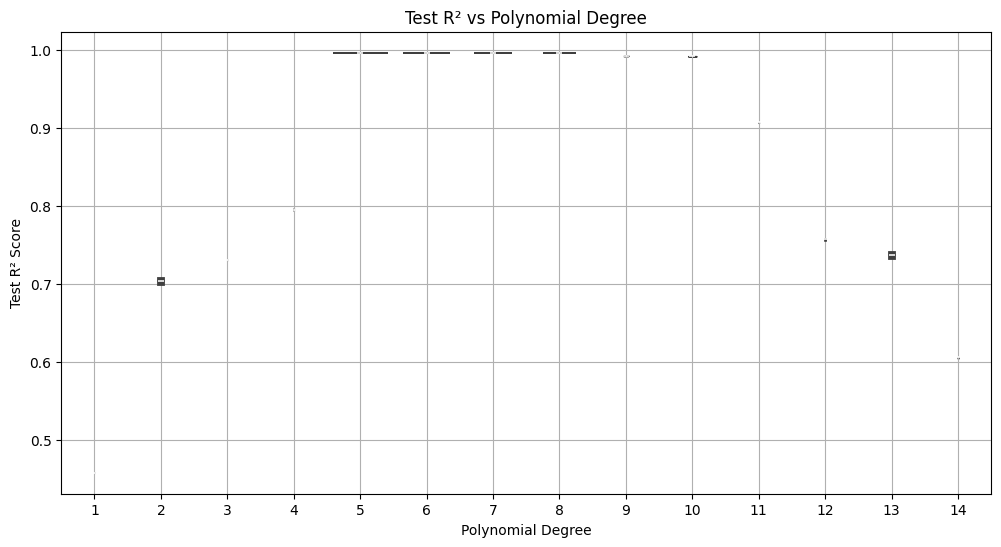

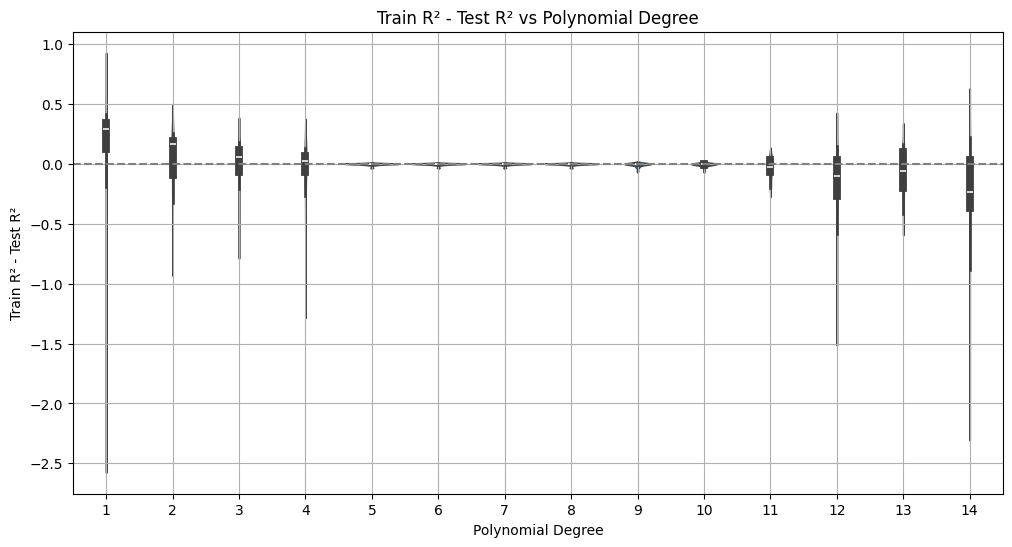

In [7]:

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create 30 random samples of size 20 from training data
samples = [train_data.sample(n=20, random_state=i) for i in range(30)]

# Prepare test data
X_test = test_data[['x']].values
y_test = test_data['y'].values

# Store results
error_records = []

# Loop over each of the 30 samples
for i in range(30):
    val_sample = samples[i]
    val_X = val_sample[['x']].values
    val_y = val_sample['y'].values

    # Train on full training data excluding the current validation sample
    train_excluded = train_data.drop(val_sample.index)
    train_X = train_excluded[['x']].values
    train_y = train_excluded['y'].values

    for degree in range(1, 15):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(train_X)
        X_val_poly = poly.transform(val_X)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, train_y)

        val_pred = model.predict(X_val_poly)
        test_pred = model.predict(X_test_poly)

        train_r2 = r2_score(val_y, val_pred)
        test_r2 = r2_score(y_test, test_pred)

        error_records.append({
            'excluded_sample': i,
            'degree': degree,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'r2_diff': train_r2 - test_r2
        })

# Convert to DataFrame
error_df = pd.DataFrame(error_records)

# Print R² scores for each sample and degree
for sample_id in range(30):
    print(f"\n Sample {sample_id + 1}")
    sample_data = error_df[error_df['excluded_sample'] == sample_id]

    for _, row in sample_data.iterrows():
        print(f"Degree {int(row['degree'])} | Train R²: {row['train_r2']:.4f} | Test R²: {row['test_r2']:.4f}")

# Violin plot: Test R² vs Degree
plt.figure(figsize=(12, 6))
sns.violinplot(x='degree', y='test_r2', data=error_df)
plt.title('Test R² vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test R² Score')
plt.grid(True)
plt.show()

# Violin plot: Train R² - Test R² vs Degree
plt.figure(figsize=(12, 6))
sns.violinplot(x='degree', y='r2_diff', data=error_df)
plt.title('Train R² - Test R² vs Polynomial Degree')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Polynomial Degree')
plt.ylabel('Train R² - Test R²')
plt.grid(True)
plt.show()


In [8]:
from sklearn.model_selection import KFold, cross_val_score

# Use the first sample of 20 points
sample_0 = samples[0]
X_sample = sample_0[['x']].values
y_sample = sample_0['y'].values

# Store average CV scores
cv_scores = []

# Try polynomial degrees from 1 to 14
for degree in range(1, 15):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_sample)

    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y_sample, cv=5, scoring='r2')
    mean_score = scores.mean()
    cv_scores.append({'degree': degree, 'cv_score': mean_score})

# Find degree with best mean R² score
cv_df = pd.DataFrame(cv_scores)
best_degree = cv_df.loc[cv_df['cv_score'].idxmax(), 'degree']

print("Best degree selected by 5-fold CV:", int(best_degree))
print(cv_df.sort_values(by='cv_score', ascending=False))



Best degree selected by 5-fold CV: 5
    degree      cv_score
4        5  9.194725e-01
5        6  8.586980e-01
3        4  8.459540e-01
2        3  7.161791e-01
6        7  1.970902e-01
1        2 -6.051450e-01
0        1 -8.652418e-01
7        8 -1.140672e+01
8        9 -1.495737e+03
9       10 -8.869326e+03
10      11 -3.607993e+06
11      12 -2.467653e+08
13      14 -4.364602e+09
12      13 -2.284924e+10


In [9]:
# Fit final model on full 20-point sample using best degree
poly_final = PolynomialFeatures(degree=int(best_degree))
X_sample_poly = poly_final.fit_transform(X_sample)

model_final = LinearRegression()
model_final.fit(X_sample_poly, y_sample)


LinearRegression()

In [10]:
# Transform test data using the same polynomial transformer
X_test_poly_final = poly_final.transform(X_test)

# Predict and calculate R² on test set
test_predictions = model_final.predict(X_test_poly_final)
final_test_r2 = r2_score(y_test, test_predictions)

print("Final Test R² Score:", round(final_test_r2, 4))


Final Test R² Score: 0.8658


In [11]:
# Assume column names are 'x' and 'y'. Change if needed
X_train = train_data[['x']]
y_train = train_data['y']
X_test = test_data[['x']]
y_test = test_data['y']

# Store results
results = []

# Loop through polynomial degrees
for degree in range(1, 11):
    # Build pipeline with Polynomial features and Lasso with 10-fold CV
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LassoCV(cv=10, random_state=42)
    )
    # Fit model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate R2 score
    r2 = r2_score(y_test, y_pred)

    results.append((degree, r2))
    print(f"Degree {degree}: Test R2 Score = {r2:.4f}")

# Optional: Show all results in a DataFrame
results_df = pd.DataFrame(results, columns=['Degree', 'Test_R2_Score'])
print("\nSummary of R² scores:")
print(results_df)

Degree 1: Test R2 Score = 0.4578
Degree 2: Test R2 Score = 0.7028
Degree 3: Test R2 Score = 0.6733
Degree 4: Test R2 Score = 0.5113
Degree 5: Test R2 Score = 0.9505
Degree 6: Test R2 Score = 0.3022
Degree 7: Test R2 Score = 0.2145
Degree 8: Test R2 Score = 0.2478
Degree 9: Test R2 Score = 0.2303
Degree 10: Test R2 Score = 0.2479

Summary of R² scores:
   Degree  Test_R2_Score
0       1       0.457801
1       2       0.702836
2       3       0.673253
3       4       0.511285
4       5       0.950461
5       6       0.302187
6       7       0.214479
7       8       0.247837
8       9       0.230328
9      10       0.247889


In [12]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

# Convert DataFrame to NumPy arrays (to avoid feature names warning)
X_train = train_data[['x']].to_numpy()
y_train = train_data['y'].to_numpy()
X_test = test_data[['x']].to_numpy()
y_test = test_data['y'].to_numpy()

# Store results
enet_results = []

for degree in range(1, 11):
    # Create pipeline with PolynomialFeatures, StandardScaler, and ElasticNetCV
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        ElasticNetCV(
            cv=10,
            max_iter=10000,  # Fixes convergence warning
            l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  # Mix of L1 & L2
            random_state=42
        )
    )

    # Train model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)

    # Store results
    enet_results.append((degree, r2))
    print(f"Degree {degree}: ElasticNet Test R² = {r2:.4f}")

# Create DataFrame for results
enet_df = pd.DataFrame(enet_results, columns=["Degree", "ElasticNet_Test_R2"])
print("\nSummary of ElasticNet R² Scores:")
print(enet_df)


Degree 1: ElasticNet Test R² = 0.4578
Degree 2: ElasticNet Test R² = 0.7029
Degree 3: ElasticNet Test R² = 0.7309
Degree 4: ElasticNet Test R² = 0.7950
Degree 5: ElasticNet Test R² = 0.9965
Degree 6: ElasticNet Test R² = 0.9965
Degree 7: ElasticNet Test R² = 0.9962
Degree 8: ElasticNet Test R² = 0.9962
Degree 9: ElasticNet Test R² = 0.9962
Degree 10: ElasticNet Test R² = 0.9962

Summary of ElasticNet R² Scores:
   Degree  ElasticNet_Test_R2
0       1            0.457801
1       2            0.702851
2       3            0.730939
3       4            0.795038
4       5            0.996466
5       6            0.996469
6       7            0.996203
7       8            0.996215
8       9            0.996215
9      10            0.996236
